# Titanic Dataset - Exploratory Data Analysis (EDA)



## 1. Loading Data



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [6]:
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Handling Missing Values



In [7]:
print("Shape of the Dataset: ", df.shape)
df.info()

df.isnull().sum()

Shape of the Dataset:  (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [8]:
df.dropna(subset=['embarked', 'embark_town'], inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df.isnull().sum()

/tmp/ipython-input-8-2241881087.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


## 3. Visualizing Survival by Gender/Class



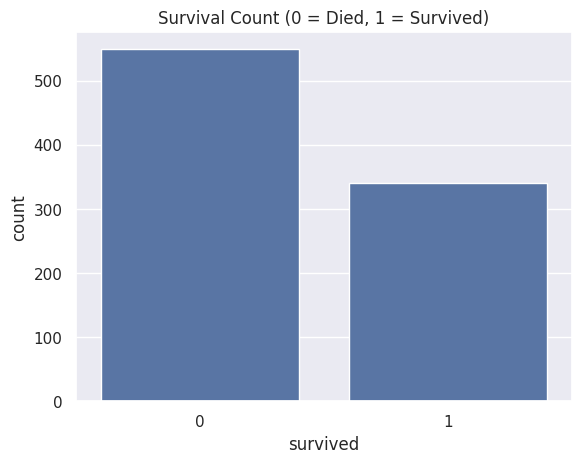

In [9]:
sns.countplot(x='survived', data=df)
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

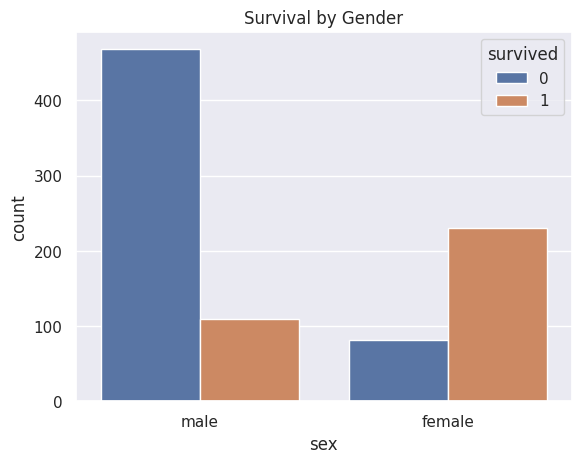

In [10]:
sns.countplot(x='sex', hue='survived',data=df)
plt.title('Survival by Gender')
plt.show()

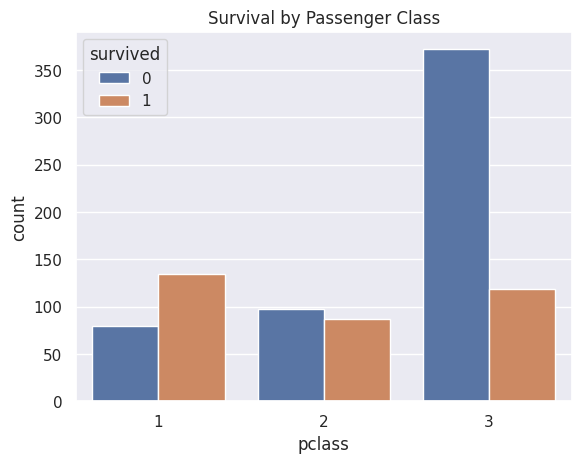

In [11]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

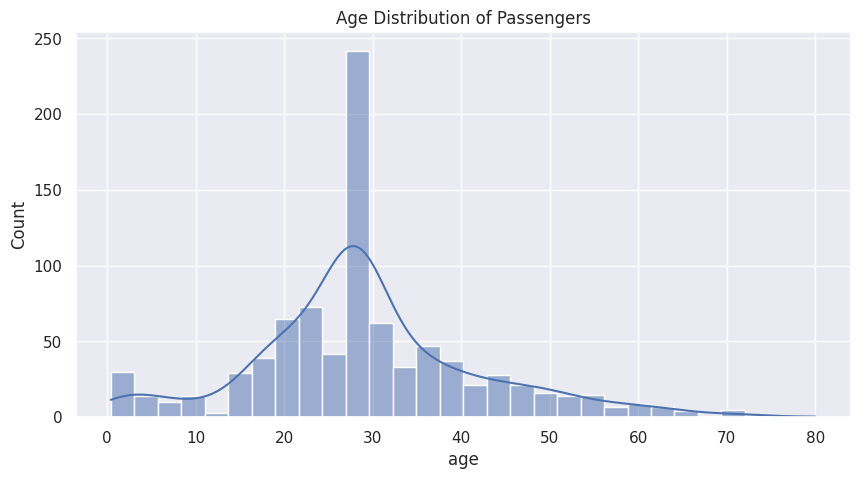

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()


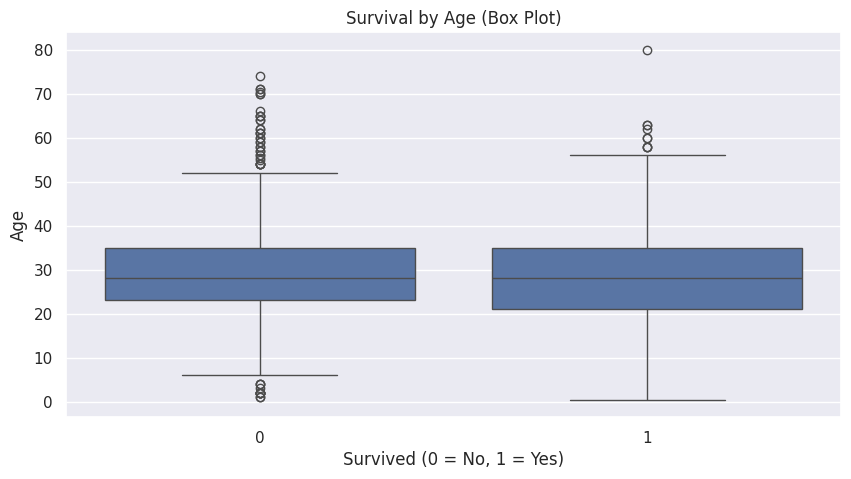

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Survival by Age (Box Plot)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

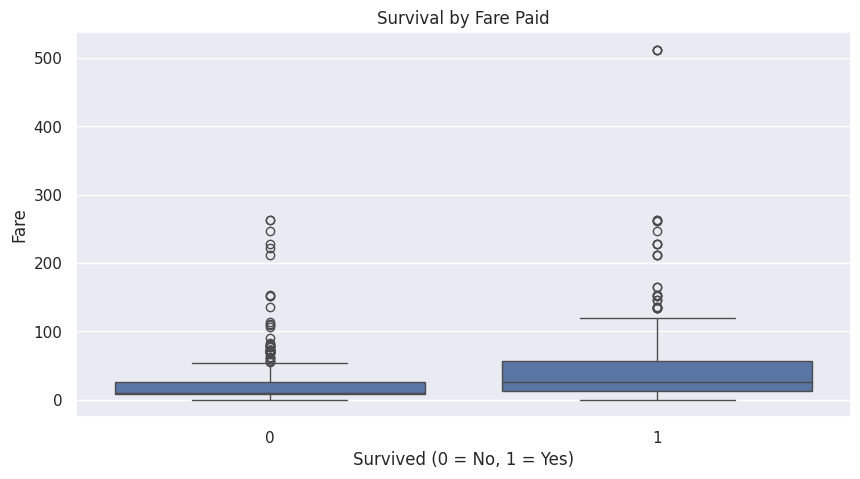

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Survival by Fare Paid')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


## 4. Correlation Heatmap and Pairplot



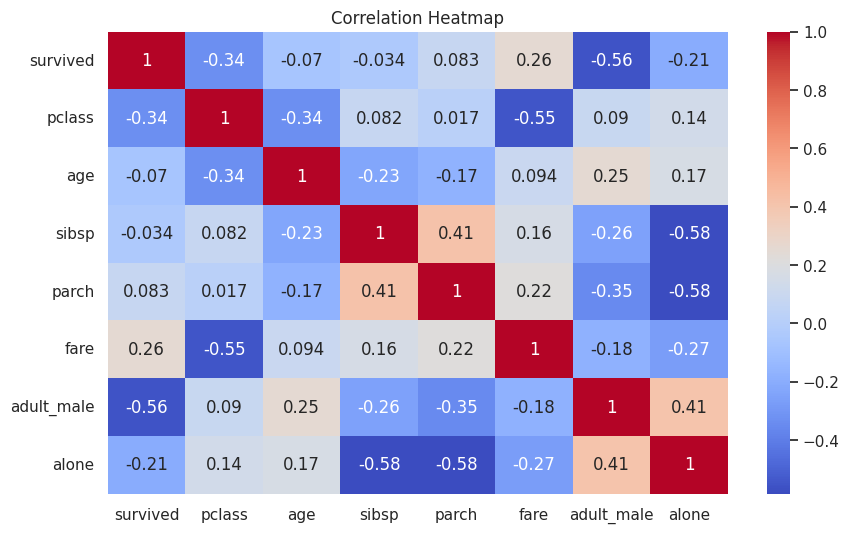

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

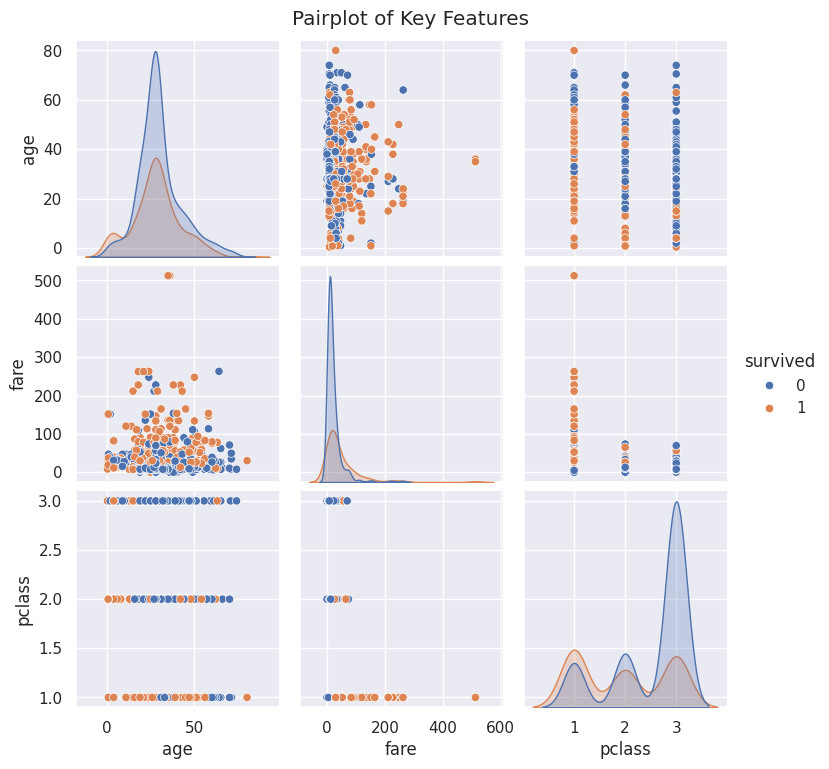

In [21]:
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']], hue='survived')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

In [22]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['alone'] = df['family_size'].apply(lambda x: 1 if x == 1 else 0)

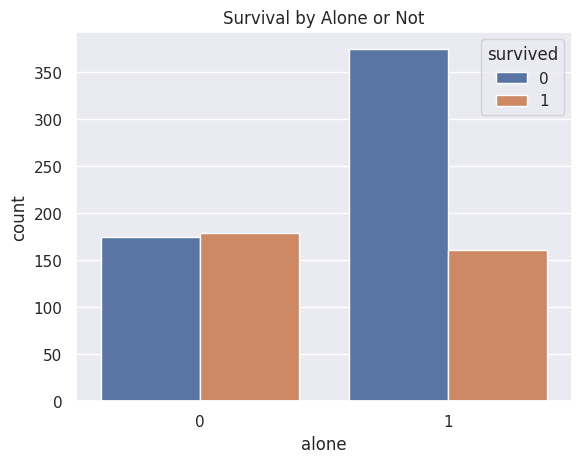

sex
female    0.740385
male      0.188908
Name: survived, dtype: float64
pclass
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [25]:
sns.countplot(x='alone', hue='survived', data=df)
plt.title('Survival by Alone or Not')
plt.show()
print(df.groupby('sex')['survived'].mean())
print(df.groupby('pclass')['survived'].mean())
